Matthew Sett
<br>
Date: Jan. 18, 2023
<br>
PHYS 2030 W23

# <center><font color=#46769B>Exercise 4: Error propagation with Monte Carlo sampling</font></center>

## <font color=#46769B>Introduction:</font>

__Error propagation__ or __propagation of uncertainties__ is a key concept in statistics that deals with how the errors of one or more quantities are related to the errors of other quantities that are derived from them. For example, suppose in lab we measure two distances $x$ and $y$ to be

$$x = 5.10 \pm 0.03 \; {\rm cm} \, , \qquad y = 3.39 \pm 0.04 \; {\rm cm}$$

As argued in Lesson 1, the central values quoted here correspond to the mean values $\langle x \rangle$ and $\langle y \rangle$ (say, averaged over multiple measurements). The errors quoted here are the standard errors of the mean, $E_x$ and $E_y$.

Now, suppose we want to add them together to determine the total distance $z = x + y$. Here $z$ is not measured directly; it is derived from $x$ and $y$, and the error $E_z$ is derived from $E_x$ and $E_y$. How does this work? In other words, how do the errors for $x$ and $y$ add together to give the error on $z$?

Before we proceed, we note that there are two types of errors:
- __Statistical error__ (or __random error__) refers to random differences between measurements, e.g., due to unpredictable differences in the measurement setup or observer. We perform multiple measurements and average over them because it is assumed that such errors will tend to average to zero over a large number of measurements.
- __Systematic error__ refers to an overall bias that is common to all measurements. For example, suppose your ruler is of poor quality (wrong size) and all measurements are skewed by the same amount. This means that systematic errors do not tend to average to zero over many measurements.

How we approach the propagation of errors depends on which type of error we are considering. In this exercise, we focus on *statistical errors* only.

Now, the usual method for (statistical) error propagation, which you likely have learned in your lab classes, is to use various analytical rules and formulas. Here, for $z = x + y$, we should calculate the central value of $z$ as the sum $\langle x \rangle + \langle y \rangle$, and the error is calculated by adding the errors __in quadrature__:

$$E_z = \sqrt{E_x^2 + E_y^2} \, .$$

So, for the numbers quoted in the simple example above, we have $z = 8.49 \pm 0.05$.

Now, what does this have to do with __Monte Carlo sampling__? It turns out that Monte Carlo sampling is *another* method we can use to propagate errors. It can be very useful because it applies even in situations where the the derived quantity may be a very complicated function of the measured quantities.

In this exercise, our goals are:
- Derive analytical rules for propagating statistical errors
- Show how to propagate errors using Monte Carlo sampling
- Verify that both approaches to error propagation give same result

Required reading:
- *Lesson 2: Normal distributions*

## <font color=#46769B>Mathematical proof:</font>

Let's state what we want to show. Suppose we have two measured quantities, $x$ and $y$, quoted in terms of their central values and errors:

$$\langle x \rangle \pm E_x \, , \qquad \langle y \rangle \pm E_y \, .$$

We want to derive a quantity $z$ defined by

$$z = a x + b y$$

where to be more general we have introduced constants $a,b$, which are assumed to be known numbers. (The example above had $a=b=1$.)

The central value and error on $z$ are

$$\langle z \rangle = a \langle x \rangle + b \langle y \rangle  \qquad (1)$$

$$E_z = \sqrt{ a^2 E_x^2 + b^2 E_y^2} \qquad (2) $$

and we would quote $\langle z \rangle \pm E_z$ for $z$. 

Now for the proof. We are going to use the language of PDFs. Consider two variables $x$ and $y$, each with their own PDFs, $P_x(x)$ and $P_y(y)$. 
The true mean for $z$ is

$$\bar{z} = \overline{a x + b y} = \int_{-\infty}^{\infty} dx \, P_x(x) \int_{-\infty}^{\infty} dy \, P_y(y) \, (a x + b y) = a \int_{-\infty}^{\infty} dx \, x \, P_x(x) \int_{-\infty}^{\infty} dy \, P_y(y) + b \int_{-\infty}^{\infty} dx \, P_x(x) \int_{-\infty}^{\infty} dy \, y \, P_y(y) = a \bar{x} + b \bar{y} \qquad (3)$$

using some formulas for PDFs from Lesson 1:

$$1 = \int_{-\infty}^{\infty} dx \, P_x(x) \, ,  \qquad \bar{x} = \int_{-\infty}^{\infty} dx \, x \, P_x(x) $$

$$1 = \int_{-\infty}^{\infty} dy \, P_y(y) \, ,  \qquad \bar{y} = \int_{-\infty}^{\infty} dy \, y \, P_y(y) $$

According to the Law of Large Numbers, we can approximate Eq. (3) by Eq. (1).

Next, we calculate the true variance for $z$

$$\sigma_z^2 = \overline{z^2} - \bar{z}^2$$

in terms of the true variances for $x$ and $y$

$$\sigma_x^2 = \overline{x^2} - \bar{x}^2 \, , \qquad \sigma_y^2 = \overline{y^2} - \bar{y}^2 \, .$$

We have 

$$\sigma_z^2 = \overline{(a x + b y)^2} - (a \bar{x} + b \bar{y})^2 = a^2 \overline{x^2} + 2 a b \bar{x} \bar{y} + b^2 \overline{y^2} - a^2 \bar{x}^2 - 2 a b \bar{x} \bar{y} - b^2 \bar{y}^2 = a^2 \sigma_x^2 + b^2 \sigma_y^2 \, . \qquad (4)$$

Here we are talking about that standard deviations $\sigma_x$ and $\sigma_y$, which are different than the *standard errors of the means* $E_x$ and $E_y$. But recall by the Central Limit Theorem, $E_x$ and $E_y$ are themselves the standard deviations of the normal distributions of the mean values of $\langle x\rangle$ and $\langle y\rangle$, respectively. 
So, Eq. (4) applies equally if we replace $\sigma_x, \sigma_y, \sigma_z \to E_x, E_y, E_z$. That proves Eq. (2).


## <font color=#46769B>Exercise</font>

Suppose we have three resistors of type $A$ and two resistors of type $B$, all attached in series. The formula for the total resistance $R$ is the sum of all resistances:

$$R = 3 R_A + 2 R_B$$

Assume that resistors of type A are all identical and with resistance

$$R_A = 85 \pm 5 \; {\rm ohms} \, .$$

Likewise resistors of type $B$ are all identical with resistance

$$R_B = 120 \pm 6 \; {\rm ohms} \, .$$

Calculate the central value and error on $R_{\rm total}$ using Monte Carlo sampling, and compare your results to the analytic formulas derived above. Specfically, your tasks are as follows:

- Generate $N=10^5$ samples for both $R_A$ and $R_B$ from normal distributions. For sampling $R_A$, you set $\mu$ and $\sigma$ to be the central value and error on $R_A$ quoted above (and similarly for $R_B$).
- Obtain $N$ samples for $R$ from your samples for $R_A$ and $R_B$, according to the formula above.
- Calculate and print the mean and standard deviation for $R$ from your samples, and also print the analytic central value and error for $R$ following Eq. (1) and (2).
- Plot a histogram of your samples for $R$. On the same plot, plot a normal distribution for $R$ centered at the central value calculated from Eq. (1) and with standard deviation given by the error from Eq. (2). Be sure that your plot is labeled and has a suitable number of bins.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

N = 10**5
Ra = np.random.normal(85,5,N)
Rb = np.random.normal(120,6,N)
R = 3*Ra+2*Rb
mean_R = np.mean(R)
var_R = np.var(R)
std_dev = np.std(R)
print(mean_R)
print(var_R)
print(std_dev)

495.0095430757968
368.2225643643411
19.18912620116771


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   0.,   1.,   2.,   3.,   1.,   0.,   2.,   1.,   2.,
          2.,   2.,   2.,   0.,   1.,   1.,   3.,   1.,   3.,   2.,   4.,
          1.,   3.,   1.,   5.,   5.,   6.,   4.,   5.,   4.,   4.,   8.,
          7.,   3.,   5.,   8.,   3.,   7.,  17.,   9.,   7.,   8.,   7.,
         11.,   4.,   9.,  10.,  15.,   6.,  12.,   7.,  27.,  10.,  20.,
         12.,  13.,  15.,  15.,  16.,  18.,  26.,  16.,  17.,  29.,  31.,
         15.,  25.,  18.,  22.,  24.,  28.,  27.,  30.,  39.,  37.,  43.,
         34.,  38.,  43.,  46.,  43.,  52.,  50.,  63.,  62.,  51.,  56.,
         62.,  64.,  64.,  73.,  85.,  69., 104.,  71.,  84.,  95.,  78.,
         93., 105.,  94., 103., 117., 

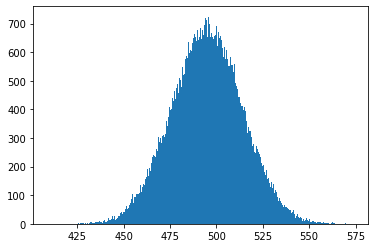

In [24]:
plt.hist(R, bins = 500)

In [34]:
D = np.sqrt((3*5)**2+(2*6)**2)

In [38]:
print(D)

19.209372712298546
